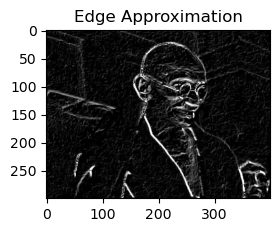

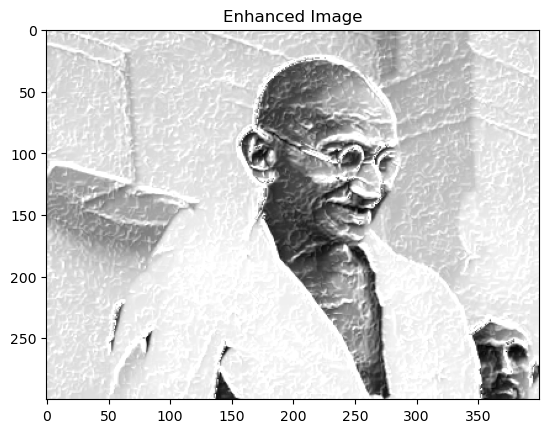

In [68]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io, color

IMG_PATH = './images/'
IMG_NAME = 'gandhi.jpg'
# Load the image in grayscale
input_image = cv2.imread(IMG_PATH +IMG_NAME, cv2.IMREAD_GRAYSCALE)

#Sobel filters
sobel_horizontal = np.array([[1, 2, 1],
                            [0, 0, 0],
                            [-1, -2, -1]])

sobel_vertical = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])


edges_horizontal = cv2.filter2D(input_image, -1, sobel_horizontal)
edges_vertical = cv2.filter2D(input_image, -1, sobel_vertical)


    
#plt.figure(figsize=(10, 7))
#plt.subplot(221)
#plt.imshow(input_image, cmap='gray')
#plt.title('Original')
#
#plt.subplot(222)
#plt.imshow(edges_horizontal, cmap='gray')
#plt.title('Horizontal Edge')
#plt.subplot(223)
#plt.imshow(edges_vertical, cmap='gray')
#plt.title('Vertical Edge')
#
#    # Calculate the approximation of edges
image_combined_edges = np.abs(edges_vertical) + np.abs(edges_horizontal)
#plt.subplot(224)
#plt.imshow(image_combined_edges, cmap='gray')
#plt.title('Edge Approximation')
#plt.show()
# Adding the approximation to the original image and displaying it
enhanced_image = cv2.add(input_image, np.uint8(image_combined_edges))
plt.figure()
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced Image')
plt.show()


#grad_magnitudes = np.array([
#    [207.9, 190.64, 175.63],
#    [188, 38.4, 23.74],
#    [185.00, 47.29, 26.8]
#])
#
#grad_dir_test = np.array([
#    [-2.38339866158956, 3.01008098227013, 3.05608735991159],
#    [-1.57079632679490, 1.41419444981288, 1.08828303177242],
#    [-1.57620167955545, 1.46481196880530, 1.10714871779409]
#])



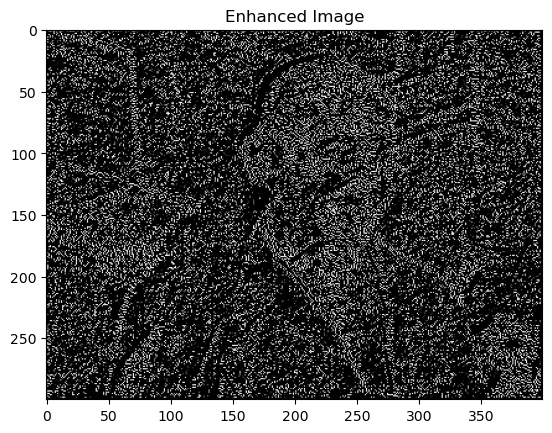

In [64]:

grad_magnitudes = np.sqrt(edges_vertical **2 + edges_horizontal**2);
grad_magnitudes[0,:]=0;
grad_magnitudes[-1,:]=0;
grad_magnitudes[:,0]=0;
grad_magnitudes[:,-1]=0;
grad_magnitudes_final = np.copy(grad_magnitudes);
grad_direction = np.arctan2(edges_vertical,edges_horizontal,)* 180 / np.pi;
grad_direction = np.mod(grad_direction + 360, 360)

for i in range(0, len(grad_direction+1)):
    for j in range(0, len(grad_direction [0]+1)):
       
        for k in range(1, 9):  # Adjust 100 here if it represents the range up to some other value
            if grad_direction[i, j] <= 22.5 + 45 * (k - 1):
                grad_direction[i, j ] = 45 * (k - 1)
                break
        else:
            grad_direction[i, j] = 0  # This executes only if the loop wasn't broken


for i in range(1, len(grad_direction)- 1):
    for j in range(1, len(grad_direction[0]) - 1):


        if grad_direction[i, j] == 0:
            if grad_magnitudes[i, j] > grad_magnitudes[i, j - 1] and grad_magnitudes[i, j] > grad_magnitudes[i, j + 1]:
                grad_magnitudes_final[i, j] = grad_magnitudes[i, j]
            else:
                grad_magnitudes_final[i, j] = 0
        
        elif grad_direction[i, j] == 45:
            # Diagonal (bottom-left to top-right) check
            if grad_magnitudes[i, j] > grad_magnitudes[i + 1, j - 1] and grad_magnitudes[i, j] > grad_magnitudes[i - 1, j + 1]:
                grad_magnitudes_final[i, j] = grad_magnitudes[i, j]
            else:
                grad_magnitudes_final[i, j] = 0

        elif grad_direction[i, j] == 90:
            # Vertical check
            if grad_magnitudes[i, j] > grad_magnitudes[i - 1, j] and grad_magnitudes[i, j] > grad_magnitudes[i + 1, j]:
                grad_magnitudes_final[i, j] = grad_magnitudes[i, j]
            else:
                grad_magnitudes_final[i, j] = 0

        elif grad_direction[i, j] == 135:
            # Diagonal (top-left to bottom-right) check
            if grad_magnitudes[i, j] > grad_magnitudes[i + 1, j + 1] and grad_magnitudes[i, j] > grad_magnitudes[i - 1, j - 1]:
                grad_magnitudes_final[i, j] = grad_magnitudes[i, j]
            else:
                grad_magnitudes_final[i, j] = 0

        elif grad_direction[i, j] == 180:
            # Horizontal check
            if grad_magnitudes[i, j] > grad_magnitudes[i, j + 1] and grad_magnitudes[i, j] > grad_magnitudes[i, j - 1]:
                grad_magnitudes_final[i, j] = grad_magnitudes[i, j]
            else:
                grad_magnitudes_final[i, j] = 0

        elif grad_direction[i, j] == 225:
            # Diagonal (top-right to bottom-left) check with bounds
            if grad_magnitudes[i, j] > grad_magnitudes[i - 1, j + 1] and grad_magnitudes[i, j] > grad_magnitudes[i + 1, j - 1]:
                grad_magnitudes_final[i, j] = grad_magnitudes[i, j]
            else:
                grad_magnitudes_final[i, j] = 0

        elif grad_direction[i, j] == 270:
            # Vertical check
            if grad_magnitudes[i, j] > grad_magnitudes[i - 1, j] and grad_magnitudes[i, j] > grad_magnitudes[i + 1, j]:
                grad_magnitudes_final[i, j] = grad_magnitudes[i, j]
            else:
                grad_magnitudes_final[i, j] = 0


plt.figure()
plt.imshow(grad_magnitudes_final,cmap='gray',aspect='auto')
plt.title('Enhanced Image')
plt.show()

In [55]:
for k in range(8):  # Adjust 100 here if it represents the range up to some other value
            print(22.5 + 45 * (k ))
            print('----------')
            print(45 * (k))
                

22.5
----------
0
67.5
----------
45
112.5
----------
90
157.5
----------
135
202.5
----------
180
247.5
----------
225
292.5
----------
270
337.5
----------
315
